MODEL NOTEBOOK


This is the notebook for model in age gender detector. Here, we will extract the ata, train it and fit it into our model and will evaluate our results and optimise the model for better results.

IMPORT NECESSARY LIBRARIES

In [1]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adadelta,Adamax, RMSprop

Extract Data from dataset

If data has not been downloaded yet, download it from [Here](https://www.kaggle.com/jangedoo/utkface-new)

In [2]:
fldr="./UTkFace"

In [3]:
import os
files=os.listdir(fldr)

Create Images List from Dataset

In [4]:
ages=[]
genders=[]
images=[]

for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./UTkFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTkFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTkFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTkFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTkFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTkFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTkFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTkFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTkFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTkFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTkFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTkFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTkFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTkFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTkFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTkFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTkFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTkFace/10_0_0_2017

Create List of Age and Gender From dataset

In [5]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

Viewing a sample

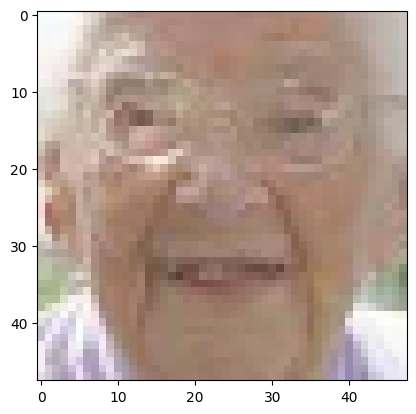

In [6]:
plt.imshow(images[16])

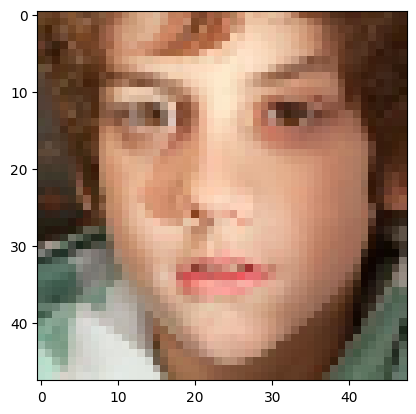

In [7]:
plt.imshow(images[42])

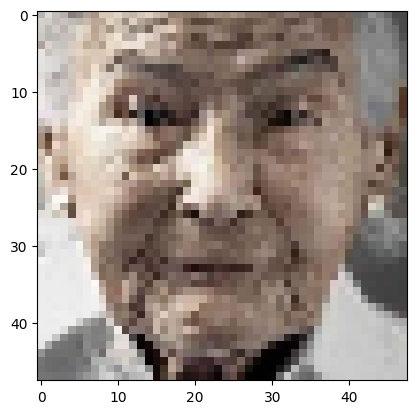

In [8]:
plt.imshow(images[9])

In [9]:
print(ages[6])

100


In [10]:
print(genders[90])

0


Saving images,ages, genders arrays in system

In [11]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [12]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

Finding the number of elements in dataset

In [13]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


Plotting the No. of Male and Female Samples Respectively

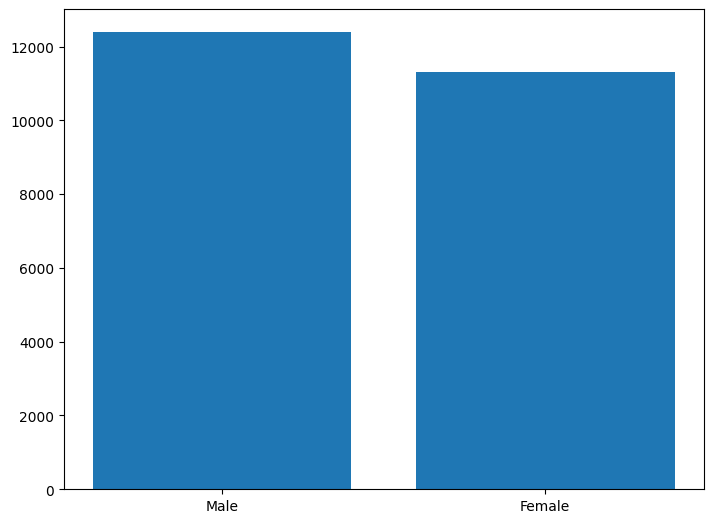

In [14]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

Finding the no. of Samples in each age

In [15]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


Converting Age Counts to lists

In [16]:
val=values.tolist()
cnt=counts.tolist()

Plotting the samples agewise

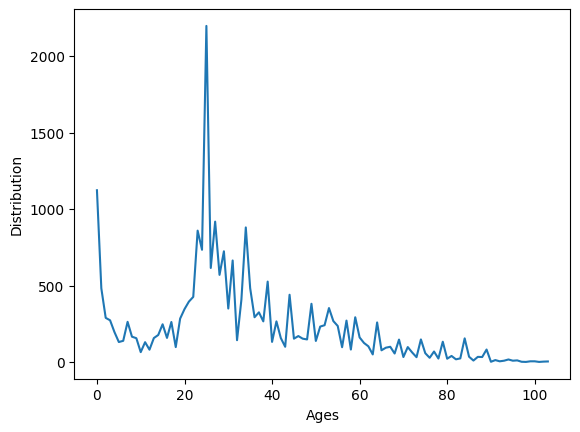

In [17]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

## Defining Labels for Output

In [18]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1


    

### Creating another list of images from existing ones
For better learning

In [19]:
images_f_2=images_f/255

In [20]:
images_f_2.shape

(23708, 48, 48, 3)

In [21]:
labels_f=np.array(labels)

### Splitting the Dataset into test and train

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [24]:
Y_train[0:5]

array([[12,  1],
       [66,  0],
       [30,  0],
       [65,  1],
       [68,  1]])

### Splitting "Y_test' and 'Y_train' Further
For better understanding

In [25]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [26]:
Y_train_2[0][0:5]

array([1, 0, 0, 1, 1])

In [27]:
Y_train_2[1][0:5]

array([12, 66, 30, 65, 68])

In [28]:
from tensorflow.keras.layers import Conv2D, Dropout, Activation
from tensorflow.keras.regularizers import l2

## Defining the Model

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [30]:
def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", strides=(1, 1), kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [31]:
def model(input_shape):
    inputs=Input(shape=input_shape)
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    return model

In [32]:
Model=model((48,48,3))

In [33]:
Model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy","accuracy"])

## Model summary

In [34]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

## Initialising the Model

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [38]:
fle_s= 'Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor="val_loss",restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

## Running the model

In [37]:
History = Model.fit(X_train,  Y_train_2, batch_size=64, validation_data=(X_test,  Y_test_2), epochs=250, callbacks=callback_list, verbose=1)

Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - age_out_accuracy: 0.0483 - loss: 18.8193 - sex_out_accuracy: 0.5311
Epoch 1: val_loss improved from inf to 16.31320, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 48s 157ms/step - age_out_accuracy: 0.0483 - loss: 18.8133 - sex_out_accuracy: 0.5311 - val_age_out_accuracy: 0.0449 - val_loss: 16.3132 - val_sex_out_accuracy: 0.5237
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - age_out_accuracy: 0.0478 - loss: 15.4502 - sex_out_accuracy: 0.5549
Epoch 2: val_loss did not improve from 16.31320
278/278 ━━━━━━━━━━━━━━━━━━━━ 45s 162ms/step - age_out_accuracy: 0.0478 - loss: 15.4469 - sex_out_accuracy: 0.5550 - val_age_out_accuracy: 0.0368 - val_loss: 17.0229 - val_sex_out_accuracy: 0.6727
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - age_out_accuracy: 0.0435 - loss: 12.4136 - sex_out_accuracy: 0.6652
Epoch 3: val_loss improved from 16.31320 to 11.74365, saving model to Age_Sex_Detection.keras
27

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.16.1


## Model Evaluation

In [ ]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - age_out_accuracy: 0.0473 - loss: 7.2964 - sex_out_accuracy: 0.8983


[7.362336158752441, 0.048422474414110184, 0.9026488661766052]

## Model Prediction

In [ ]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [ ]:
pred[1]

array([[34.542774],
       [33.423904],
       [36.757847],
       ...,
       [22.107618],
       [66.63519 ],
       [35.776684]], dtype=float32)

## Plotting loss

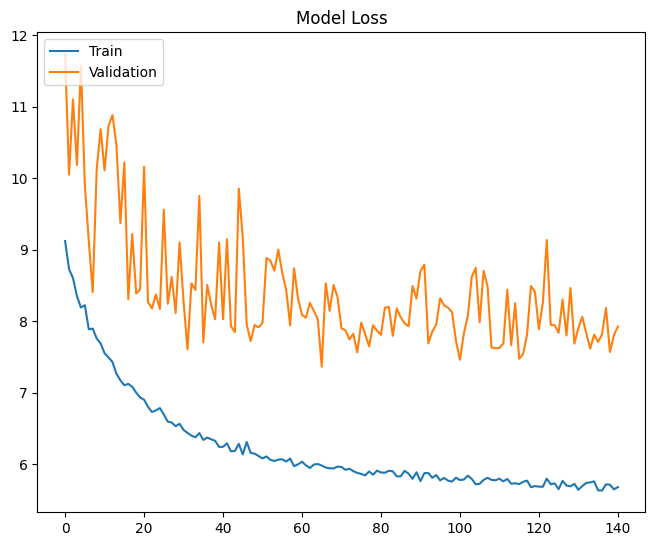

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=("Loss")
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


## Plotting sex accuracy

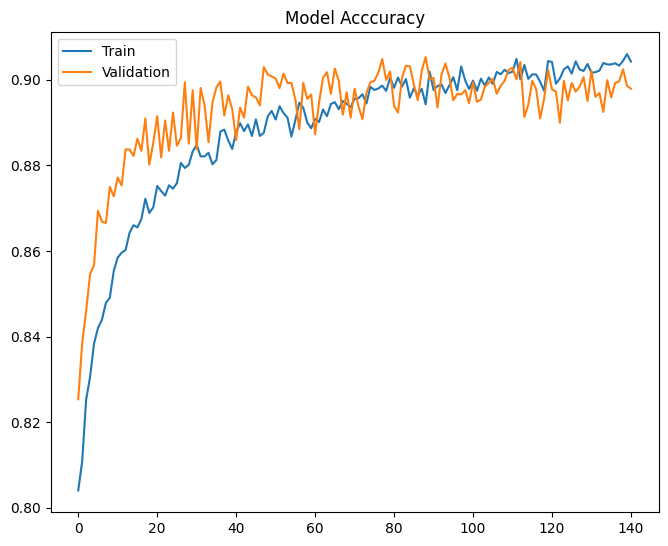

In [ ]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title("Model Acccuracy")
plt.xlabel=("Epoch")
plt.ylabel=("Accuracy")
plt.legend(['Train','Validation'],loc="upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting age accuracy

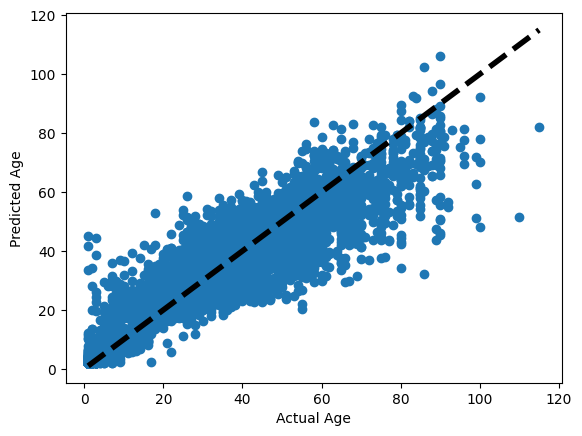

In [ ]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

### Making report of the model( Gender only)

In [ ]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\4197083195.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(Y_test_2[0],Pred_l)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      3107
           1       0.88      0.92      0.90      2820

    accuracy                           0.90      5927
   macro avg       0.90      0.90      0.90      5927
weighted avg       0.90      0.90      0.90      5927



### Making Heatmap of the Model(Sex only)

In [ ]:
results=confusion_matrix(Y_test_2[0],pred_l)

<Axes: >

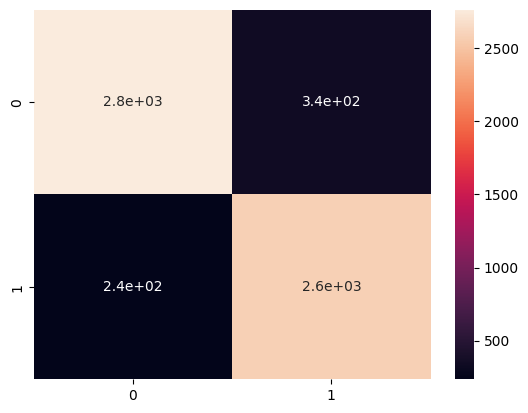

In [ ]:
import seaborn as sns
sns.heatmap(results,annot=True)

## Testing the images 

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted age is " + str(age))
    print("Predicted Gender is "+ sex_f[sex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted age is 91
Predicted Gender is Female


C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


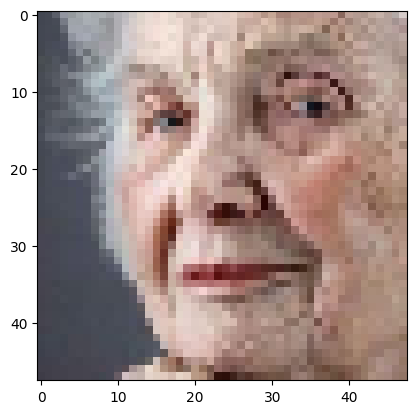

In [ ]:
test_image(4,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted age is 13
Predicted Gender is Male


C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


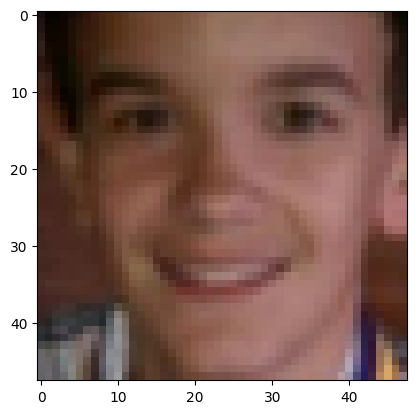

In [ ]:
test_image(23,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted age is 9
Predicted Gender is Female


C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


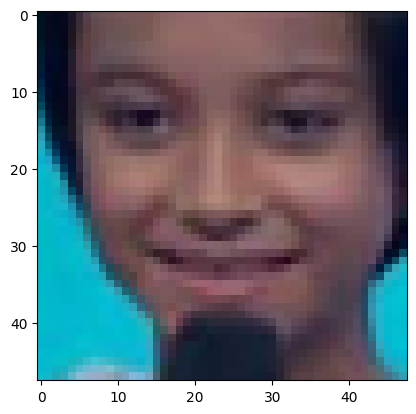

In [ ]:
test_image(168,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted age is 27
Predicted Gender is Male


C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


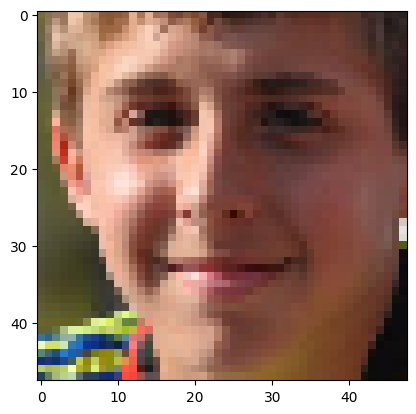

In [ ]:
test_image(888,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted age is 21
Predicted Gender is Female


C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


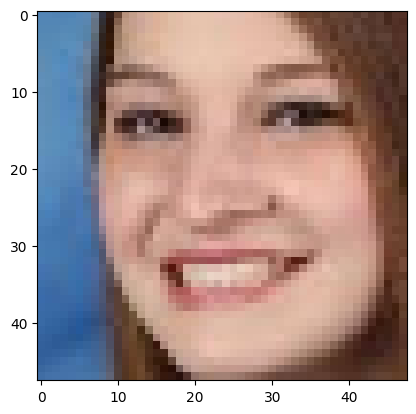

In [ ]:
test_image(1288,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted age is 78
Predicted Gender is Female


C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


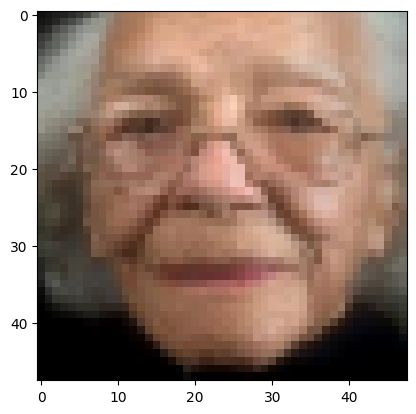

In [ ]:
test_image(5,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted age is 93
Predicted Gender is Female


C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


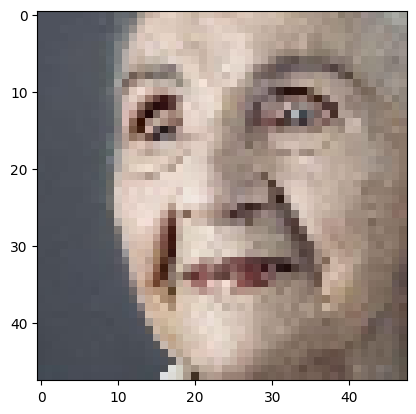

In [ ]:
test_image(3,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted age is 22
Predicted Gender is Male


C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


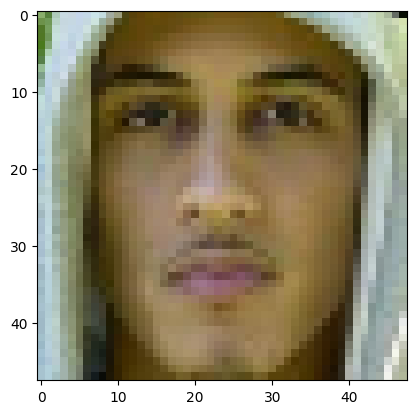

In [ ]:
test_image(3012,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted age is 21
Predicted Gender is Female


C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


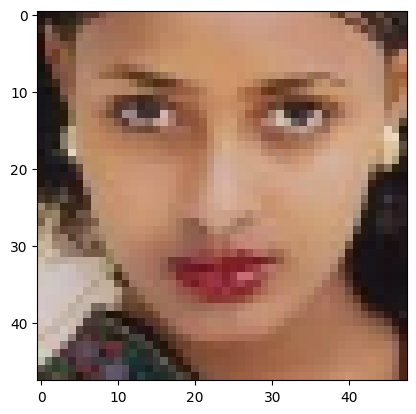

In [ ]:
test_image(1407,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted age is 2
Predicted Gender is Male


C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\vivek\AppData\Local\Temp\ipykernel_8400\3091528973.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


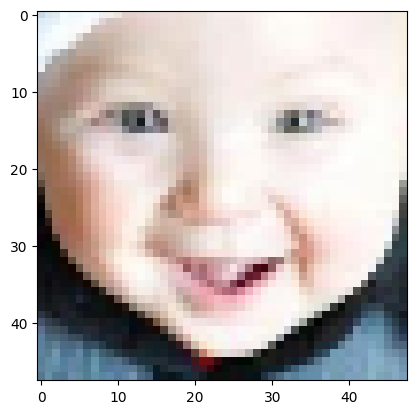

In [ ]:
test_image(1603,images_f,images_f_2,Model)